In [1]:
import pandas as pd
import numpy as np
import langid


In [2]:
df = pd.read_csv(r'juneturkey.csv')

df.head()



,Screen_Name,Profile_Description,Tweet_text,Region
0,beycim_,Bi huzursuzluk bastı. DPÜ,Emaneti çektim gerisini adalet düşünsün.,Turkey
1,ipsizmedya,#ipsizmedya,FETÖ şüphelisi bayram ziyaretinde yakalandı - ...,Turkey
2,sessizceozlemek,HİÇ\n#MEC,Bazen iki dünya sığar içime\nBazen iki güneş d...,Turkey
3,SoNSuZ_ca_,#KalemlerinSığınağı 'na\nhoş geldiniz.\nSözler...,RT @tekaskcimbom34: Günaydın TÜRKİYEM🇹🇷🇹🇷🇹🇷\n ...,Turkey
4,beycim_,Bi huzursuzluk bastı. DPÜ,"Umut, kötülüklerin en fenasıdır",Turkey


In [3]:
df.drop(['Screen_Name','Profile_Description'],inplace=True,axis=1)




In [4]:
print(df.isnull().sum())

Tweet_text    0
Region        0
dtype: int64


In [5]:
df.head()

,Tweet_text,Region
0,Emaneti çektim gerisini adalet düşünsün.,Turkey
1,FETÖ şüphelisi bayram ziyaretinde yakalandı - ...,Turkey
2,Bazen iki dünya sığar içime\nBazen iki güneş d...,Turkey
3,RT @tekaskcimbom34: Günaydın TÜRKİYEM🇹🇷🇹🇷🇹🇷\n ...,Turkey
4,"Umut, kötülüklerin en fenasıdır",Turkey


In [6]:
df['Tweet_text'] = df['Tweet_text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) 




In [7]:
jun_tr_langid = df['Tweet_text'].apply(langid.classify)
jun_tr_langs = jun_tr_langid.apply(lambda tuple: tuple[0])



In [8]:
# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(jun_tr_langs.unique()))

# percent of the total dataset in English
print("Percent of data in English (estimated):")
print((sum(jun_tr_langs=="tr")/len(jun_tr_langs))*100)



Number of tagged languages (estimated):
85
Percent of data in English (estimated):
84.40679733110926


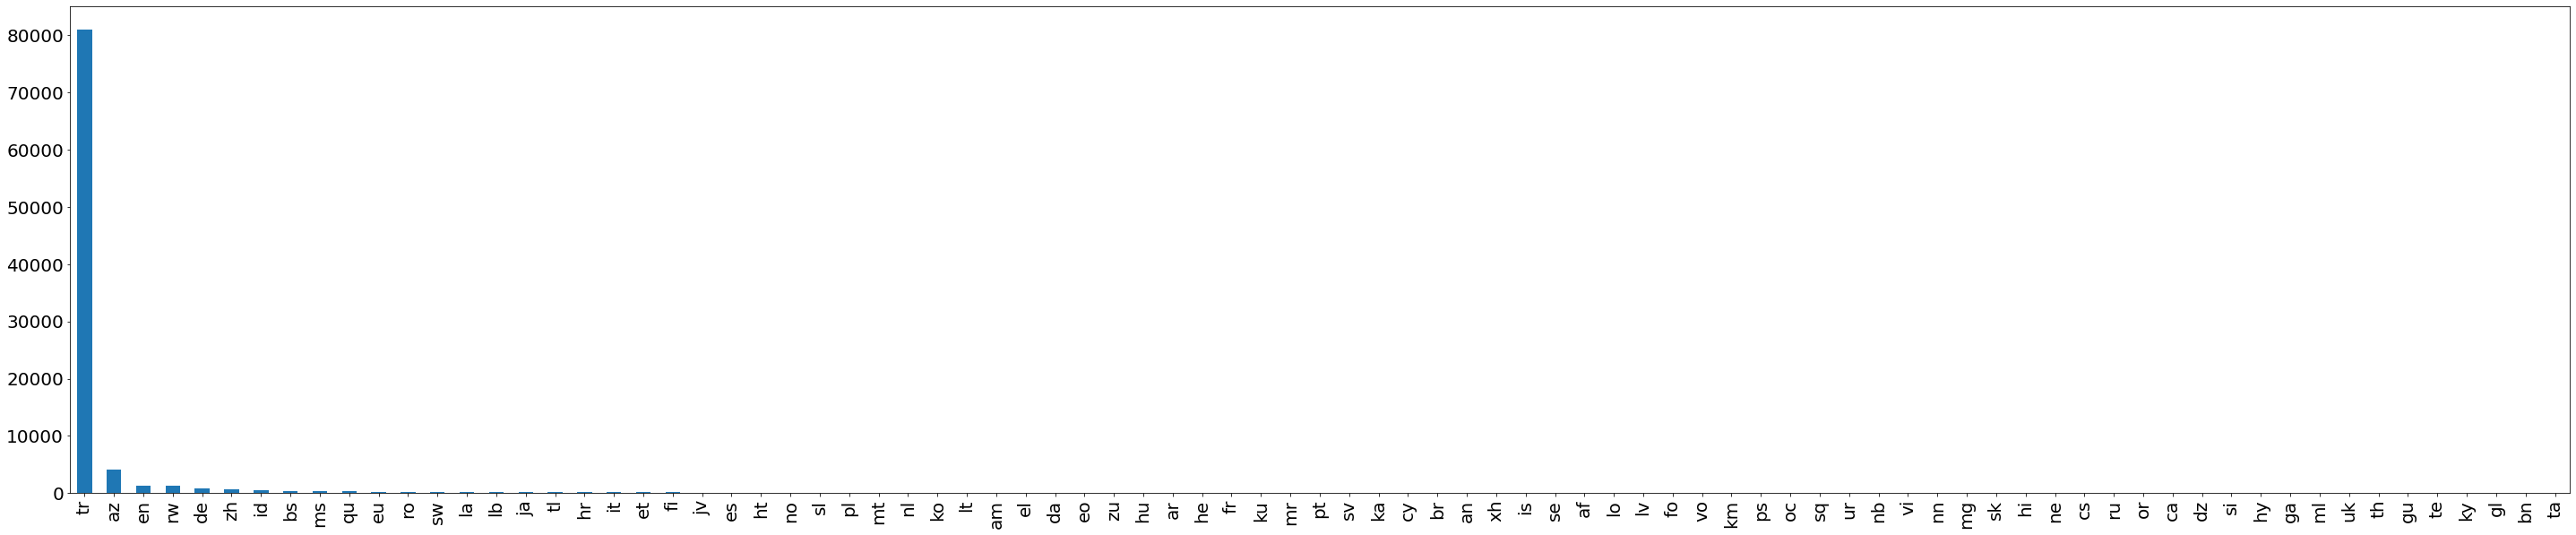

In [9]:
# convert our list of languages to a dataframe
jun_tr_langs_df = pd.DataFrame(jun_tr_langs)

# count the number of times we see each language
jun_tr_langs_count = jun_tr_langs_df.Tweet_text.value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
jun_tr_langs_count.plot.bar(figsize=(50,10), fontsize=20)



In [10]:
no_of_junturkey = jun_tr_langs[jun_tr_langs == 'tr']


In [11]:
print(no_of_junturkey.index)



Int64Index([    0,     1,     2,     4,     5,     6,     7,     8,     9,
               10,
            ...
            95908, 95909, 95910, 95911, 95912, 95913, 95914, 95915, 95917,
            95918],
           dtype='int64', length=80963)


In [12]:
from collections import Counter
print(Counter(jun_tr_langs.values))

Counter({'tr': 80963, 'az': 4087, 'en': 1358, 'rw': 1312, 'de': 920, 'zh': 691, 'id': 560, 'bs': 446, 'ms': 424, 'qu': 418, 'eu': 298, 'ro': 252, 'sw': 224, 'la': 223, 'lb': 208, 'ja': 192, 'tl': 164, 'hr': 157, 'it': 155, 'et': 153, 'fi': 149, 'jv': 144, 'es': 141, 'ht': 136, 'no': 130, 'sl': 120, 'pl': 103, 'mt': 99, 'nl': 99, 'ko': 88, 'lt': 88, 'am': 87, 'el': 77, 'da': 75, 'eo': 74, 'zu': 73, 'hu': 69, 'ar': 68, 'he': 66, 'fr': 57, 'ku': 56, 'mr': 52, 'pt': 44, 'sv': 44, 'ka': 42, 'cy': 42, 'br': 41, 'an': 37, 'xh': 32, 'is': 31, 'af': 26, 'se': 26, 'lo': 26, 'lv': 22, 'fo': 19, 'km': 18, 'vo': 18, 'ps': 16, 'oc': 16, 'ur': 14, 'sq': 14, 'nb': 13, 'vi': 13, 'mg': 11, 'sk': 11, 'nn': 11, 'ne': 10, 'hi': 10, 'cs': 9, 'ru': 7, 'or': 6, 'ca': 5, 'dz': 5, 'hy': 4, 'si': 4, 'ga': 3, 'ml': 3, 'th': 2, 'gu': 2, 'uk': 2, 'gl': 1, 'ky': 1, 'te': 1, 'ta': 1, 'bn': 1})


In [13]:
a =Counter(jun_tr_langs.values) 

In [14]:
dict(sorted(a.items(), key=lambda item: item[1], reverse=True,)).keys()

dict_keys(['tr', 'az', 'en', 'rw', 'de', 'zh', 'id', 'bs', 'ms', 'qu', 'eu', 'ro', 'sw', 'la', 'lb', 'ja', 'tl', 'hr', 'it', 'et', 'fi', 'jv', 'es', 'ht', 'no', 'sl', 'pl', 'mt', 'nl', 'ko', 'lt', 'am', 'el', 'da', 'eo', 'zu', 'hu', 'ar', 'he', 'fr', 'ku', 'mr', 'pt', 'sv', 'ka', 'cy', 'br', 'an', 'xh', 'is', 'af', 'se', 'lo', 'lv', 'fo', 'km', 'vo', 'ps', 'oc', 'ur', 'sq', 'nb', 'vi', 'mg', 'sk', 'nn', 'ne', 'hi', 'cs', 'ru', 'or', 'ca', 'dz', 'hy', 'si', 'ga', 'ml', 'th', 'gu', 'uk', 'gl', 'ky', 'te', 'ta', 'bn'])

In [16]:
dict(sorted(a.items(), key=lambda item: item[1], reverse=True,)).values()

dict_values([80963, 4087, 1358, 1312, 920, 691, 560, 446, 424, 418, 298, 252, 224, 223, 208, 192, 164, 157, 155, 153, 149, 144, 141, 136, 130, 120, 103, 99, 99, 88, 88, 87, 77, 75, 74, 73, 69, 68, 66, 57, 56, 52, 44, 44, 42, 42, 41, 37, 32, 31, 26, 26, 26, 22, 19, 18, 18, 16, 16, 14, 14, 13, 13, 11, 11, 11, 10, 10, 9, 7, 6, 5, 5, 4, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1])

In [17]:
import matplotlib.pyplot as plt

new_data1 = {'tweets':[80963, 4087, 1358, 1312, 920, 691, 560, 446, 424, 418],
           'Languages':['tr', 'az', 'en', 'rw', 'de', 'zh', 'id', 'bs', 'ms', 'qu']
}

viz_df1 = pd.DataFrame.from_dict(new_data1);viz_df1

,tweets,Languages
0,80963,tr
1,4087,az
2,1358,en
3,1312,rw
4,920,de
5,691,zh
6,560,id
7,446,bs
8,424,ms
9,418,qu


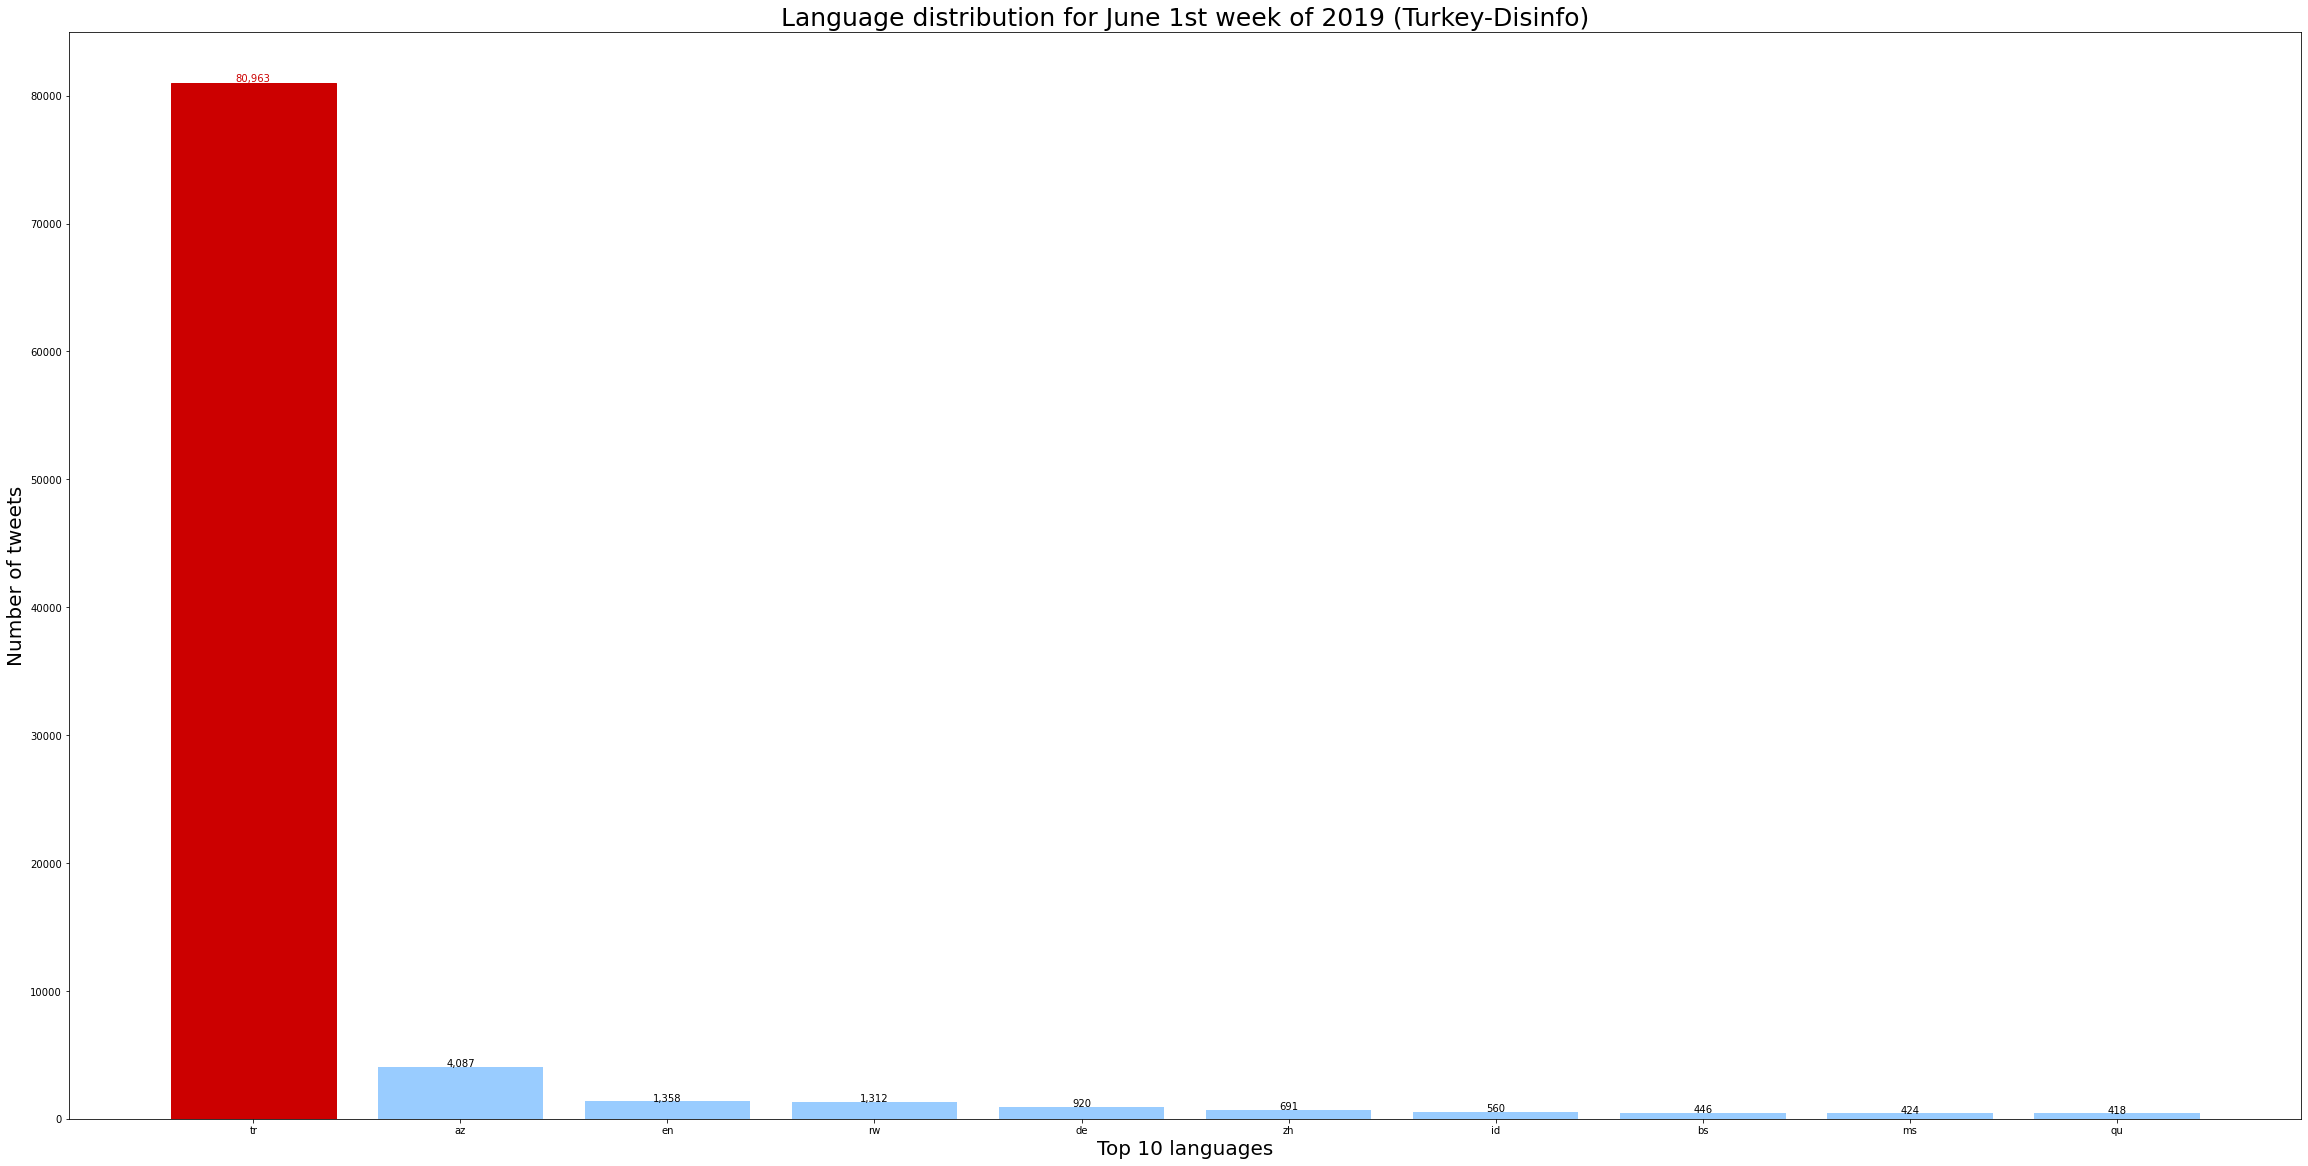

In [18]:
fig = plt.figure(figsize=(40,20))
ax1 = plt.subplot(111)
ret = ax1.bar(viz_df1['Languages'],viz_df1['tweets'],color='#99ccff')
ret[0].set_color('#CC0000')
for pX,pY in enumerate(viz_df1.tweets):
    if pX==0:
        ax1.annotate('{:,}'.format(pY), xy=(pX,pY+125), ha='center', color='#CC0000')
    else:    
        ax1.annotate('{:,}'.format(pY), xy=(pX,pY+20), ha='center')
plt.xlabel("Top 10 languages" , fontsize=20)
plt.ylabel("Number of tweets", fontsize=20)
plt.title("Language distribution for June 1st week of 2019 (Turkey-Disinfo)",fontsize=25)
plt.savefig('tr-Turkey-june.png')
plt.show()

In [19]:
june_turkey = df.loc[no_of_junturkey.index]

In [20]:
june_turkey.shape

(80963, 2)

In [21]:
june_turkey.head()

,Tweet_text,Region
0,Emaneti çektim gerisini adalet düşünsün.,Turkey
1,FETÖ şüphelisi bayram ziyaretinde yakalandı -,Turkey
2,Bazen iki dünya sığar içime\nBazen iki güneş d...,Turkey
4,"Umut, kötülüklerin en fenasıdır",Turkey
5,"Ramazan Bayramı’nın Milletimize Sağlık, Mutlul...",Turkey


In [22]:
df1 = pd.read_csv(r'juneothersturkey.csv')




In [23]:
df1.head()

,Screen_Name,Tweet_text,Region
0,carbonef954,RT @dunkindonuts: June 7th is National Donut D...,Others
1,tagjrmie,RT @Dety0: had a fun long talk with a pro abou...,Others
2,Rendy_Apriandi,Reupload. Miss this city. \nTaken by old LGv20...,Others
3,xloversUpdates,@saintdaddi on Instagram stories \n“what’s you...,Others
4,HeyoItsAndy,"Nigga, you knew what tf I meant 🥴🤣🤣🤣 — No, no ...",Others


In [24]:
df1.shape

(6999831, 3)

In [25]:
del df1['Screen_Name']

In [26]:
print(df1.isnull().sum())

Tweet_text    2
Region        0
dtype: int64


In [27]:
df1 = df1.replace(np.nan, '')

In [28]:
print(df1.isnull().sum())

Tweet_text    0
Region        0
dtype: int64


In [29]:
df1['Tweet_text'] = df1['Tweet_text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) 

In [30]:
jun_otherstr_langid = df1['Tweet_text'].apply(langid.classify)
jun_otherstr_langs = jun_otherstr_langid.apply(lambda tuple: tuple[0])

In [32]:
# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(jun_otherstr_langs.unique()))

# percent of the total dataset in English
print("Percent of data in Turkey (estimated):")
print((sum(jun_otherstr_langs=="tr")/len(jun_otherstr_langs))*100)

Number of tagged languages (estimated):
97
Percent of data in Turkey (estimated):
1.8141152264961824


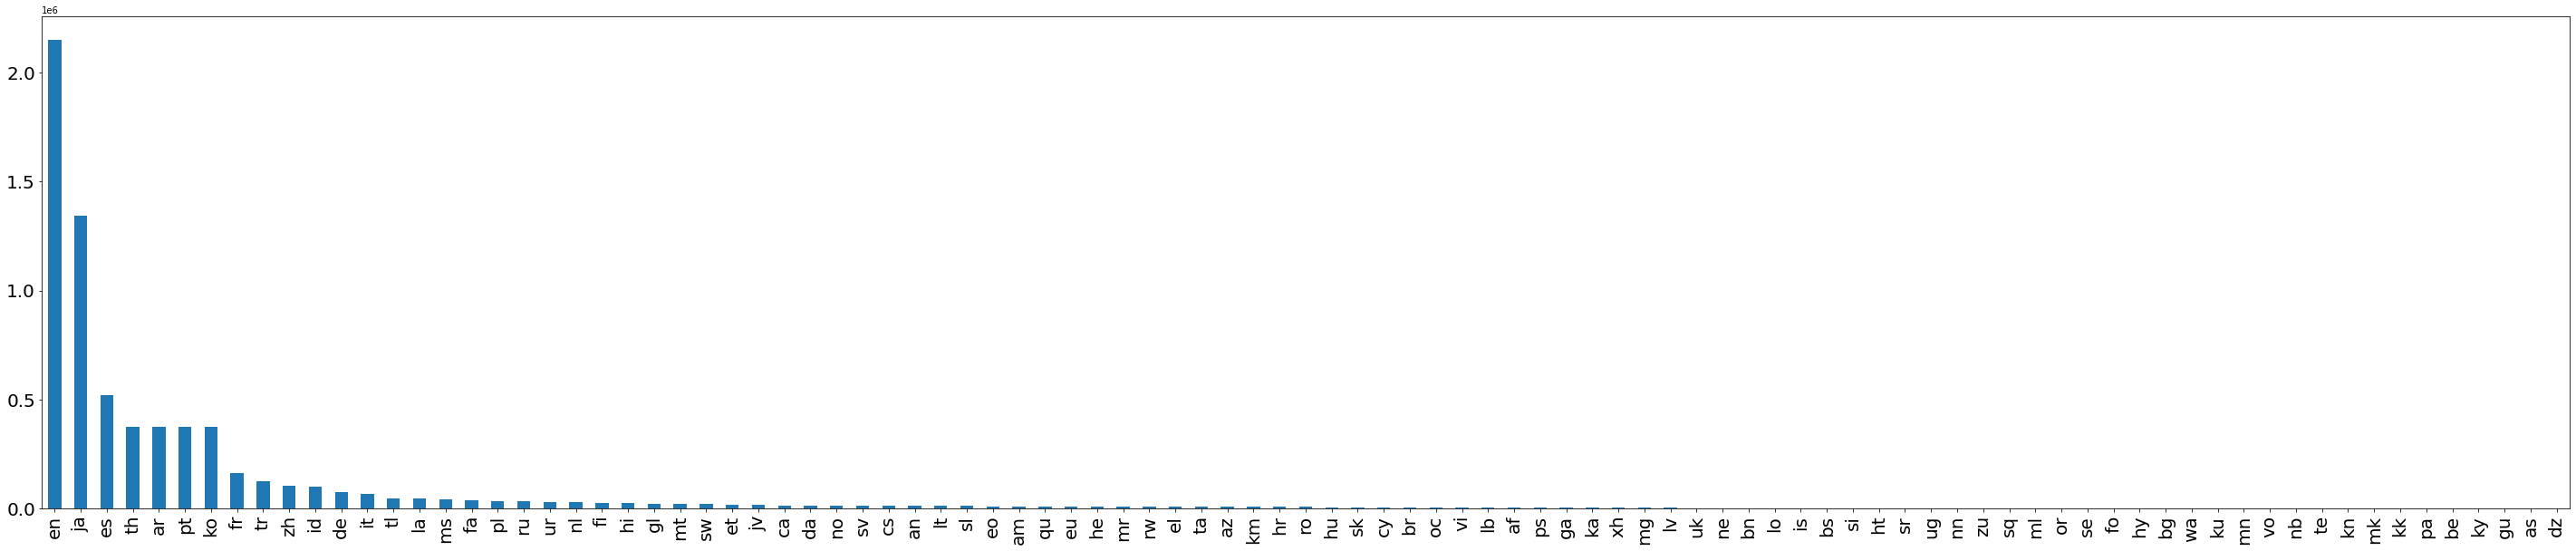

In [33]:
# convert our list of languages to a dataframe
jun_otherstrlangs_df = pd.DataFrame(jun_otherstr_langs)

# count the number of times we see each language
jun_othersrulangs_count = jun_otherstrlangs_df.Tweet_text.value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
jun_othersrulangs_count.plot.bar(figsize=(50,10), fontsize=20)

In [34]:
no_of_junotherstr = jun_otherstr_langs[jun_otherstr_langs == 'tr']

In [35]:
print(no_of_junotherstr.index)

Int64Index([      9,      20,      49,     109,     240,     333,     416,
                424,     526,     539,
            ...
            6999405, 6999480, 6999490, 6999504, 6999559, 6999567, 6999730,
            6999742, 6999786, 6999819],
           dtype='int64', length=126985)


In [36]:

print(Counter(jun_otherstr_langs.values))

Counter({'en': 2149671, 'ja': 1341766, 'es': 519297, 'th': 377242, 'ar': 376797, 'pt': 376638, 'ko': 375185, 'fr': 162483, 'tr': 126985, 'zh': 105822, 'id': 103198, 'de': 76391, 'it': 67145, 'tl': 47622, 'la': 46903, 'ms': 44073, 'fa': 38444, 'pl': 36153, 'ru': 33165, 'ur': 30895, 'nl': 29339, 'fi': 26864, 'hi': 26729, 'gl': 22250, 'mt': 21867, 'sw': 21031, 'et': 19405, 'jv': 19072, 'ca': 15948, 'da': 15449, 'no': 14721, 'sv': 13817, 'cs': 13630, 'an': 13322, 'lt': 13002, 'sl': 12968, 'eo': 11364, 'am': 10978, 'qu': 10880, 'eu': 10281, 'he': 10187, 'mr': 10134, 'rw': 9924, 'el': 9919, 'ta': 9775, 'az': 9463, 'km': 9429, 'hr': 9307, 'ro': 8230, 'hu': 7463, 'sk': 6590, 'cy': 6461, 'br': 5967, 'oc': 5904, 'vi': 5875, 'lb': 5854, 'af': 4767, 'ps': 4542, 'ga': 4428, 'ka': 4175, 'xh': 4078, 'mg': 3950, 'lv': 3864, 'uk': 3523, 'ne': 3410, 'bn': 3364, 'lo': 2969, 'is': 2902, 'bs': 2832, 'si': 2830, 'ht': 2699, 'sr': 2563, 'ug': 2377, 'nn': 2343, 'zu': 2316, 'sq': 2287, 'ml': 2203, 'or': 2145, 

In [37]:
b =Counter(jun_otherstr_langs.values) 

In [38]:
dict(sorted(b.items(), key=lambda item: item[1], reverse=True,)).keys()

dict_keys(['en', 'ja', 'es', 'th', 'ar', 'pt', 'ko', 'fr', 'tr', 'zh', 'id', 'de', 'it', 'tl', 'la', 'ms', 'fa', 'pl', 'ru', 'ur', 'nl', 'fi', 'hi', 'gl', 'mt', 'sw', 'et', 'jv', 'ca', 'da', 'no', 'sv', 'cs', 'an', 'lt', 'sl', 'eo', 'am', 'qu', 'eu', 'he', 'mr', 'rw', 'el', 'ta', 'az', 'km', 'hr', 'ro', 'hu', 'sk', 'cy', 'br', 'oc', 'vi', 'lb', 'af', 'ps', 'ga', 'ka', 'xh', 'mg', 'lv', 'uk', 'ne', 'bn', 'lo', 'is', 'bs', 'si', 'ht', 'sr', 'ug', 'nn', 'zu', 'sq', 'ml', 'or', 'se', 'fo', 'hy', 'bg', 'wa', 'ku', 'mn', 'vo', 'nb', 'te', 'kn', 'kk', 'mk', 'pa', 'be', 'ky', 'gu', 'as', 'dz'])

In [39]:
dict(sorted(b.items(), key=lambda item: item[1], reverse=True,)).values()

dict_values([2149671, 1341766, 519297, 377242, 376797, 376638, 375185, 162483, 126985, 105822, 103198, 76391, 67145, 47622, 46903, 44073, 38444, 36153, 33165, 30895, 29339, 26864, 26729, 22250, 21867, 21031, 19405, 19072, 15948, 15449, 14721, 13817, 13630, 13322, 13002, 12968, 11364, 10978, 10880, 10281, 10187, 10134, 9924, 9919, 9775, 9463, 9429, 9307, 8230, 7463, 6590, 6461, 5967, 5904, 5875, 5854, 4767, 4542, 4428, 4175, 4078, 3950, 3864, 3523, 3410, 3364, 2969, 2902, 2832, 2830, 2699, 2563, 2377, 2343, 2316, 2287, 2203, 2145, 1919, 1717, 1607, 1606, 1591, 1356, 1286, 1163, 1096, 1060, 905, 884, 884, 785, 584, 512, 461, 308, 266])

In [40]:
import matplotlib.pyplot as plt

new_data2 = {'tweets':[2149671, 1341766, 519297, 377242, 376797, 376638, 375185, 162483, 126985, 105822],
           'Languages':['en', 'ja', 'es', 'th', 'ar', 'pt', 'ko', 'fr', 'tr', 'zh']
}

viz_df2 = pd.DataFrame.from_dict(new_data2);viz_df2

,tweets,Languages
0,2149671,en
1,1341766,ja
2,519297,es
3,377242,th
4,376797,ar
5,376638,pt
6,375185,ko
7,162483,fr
8,126985,tr
9,105822,zh


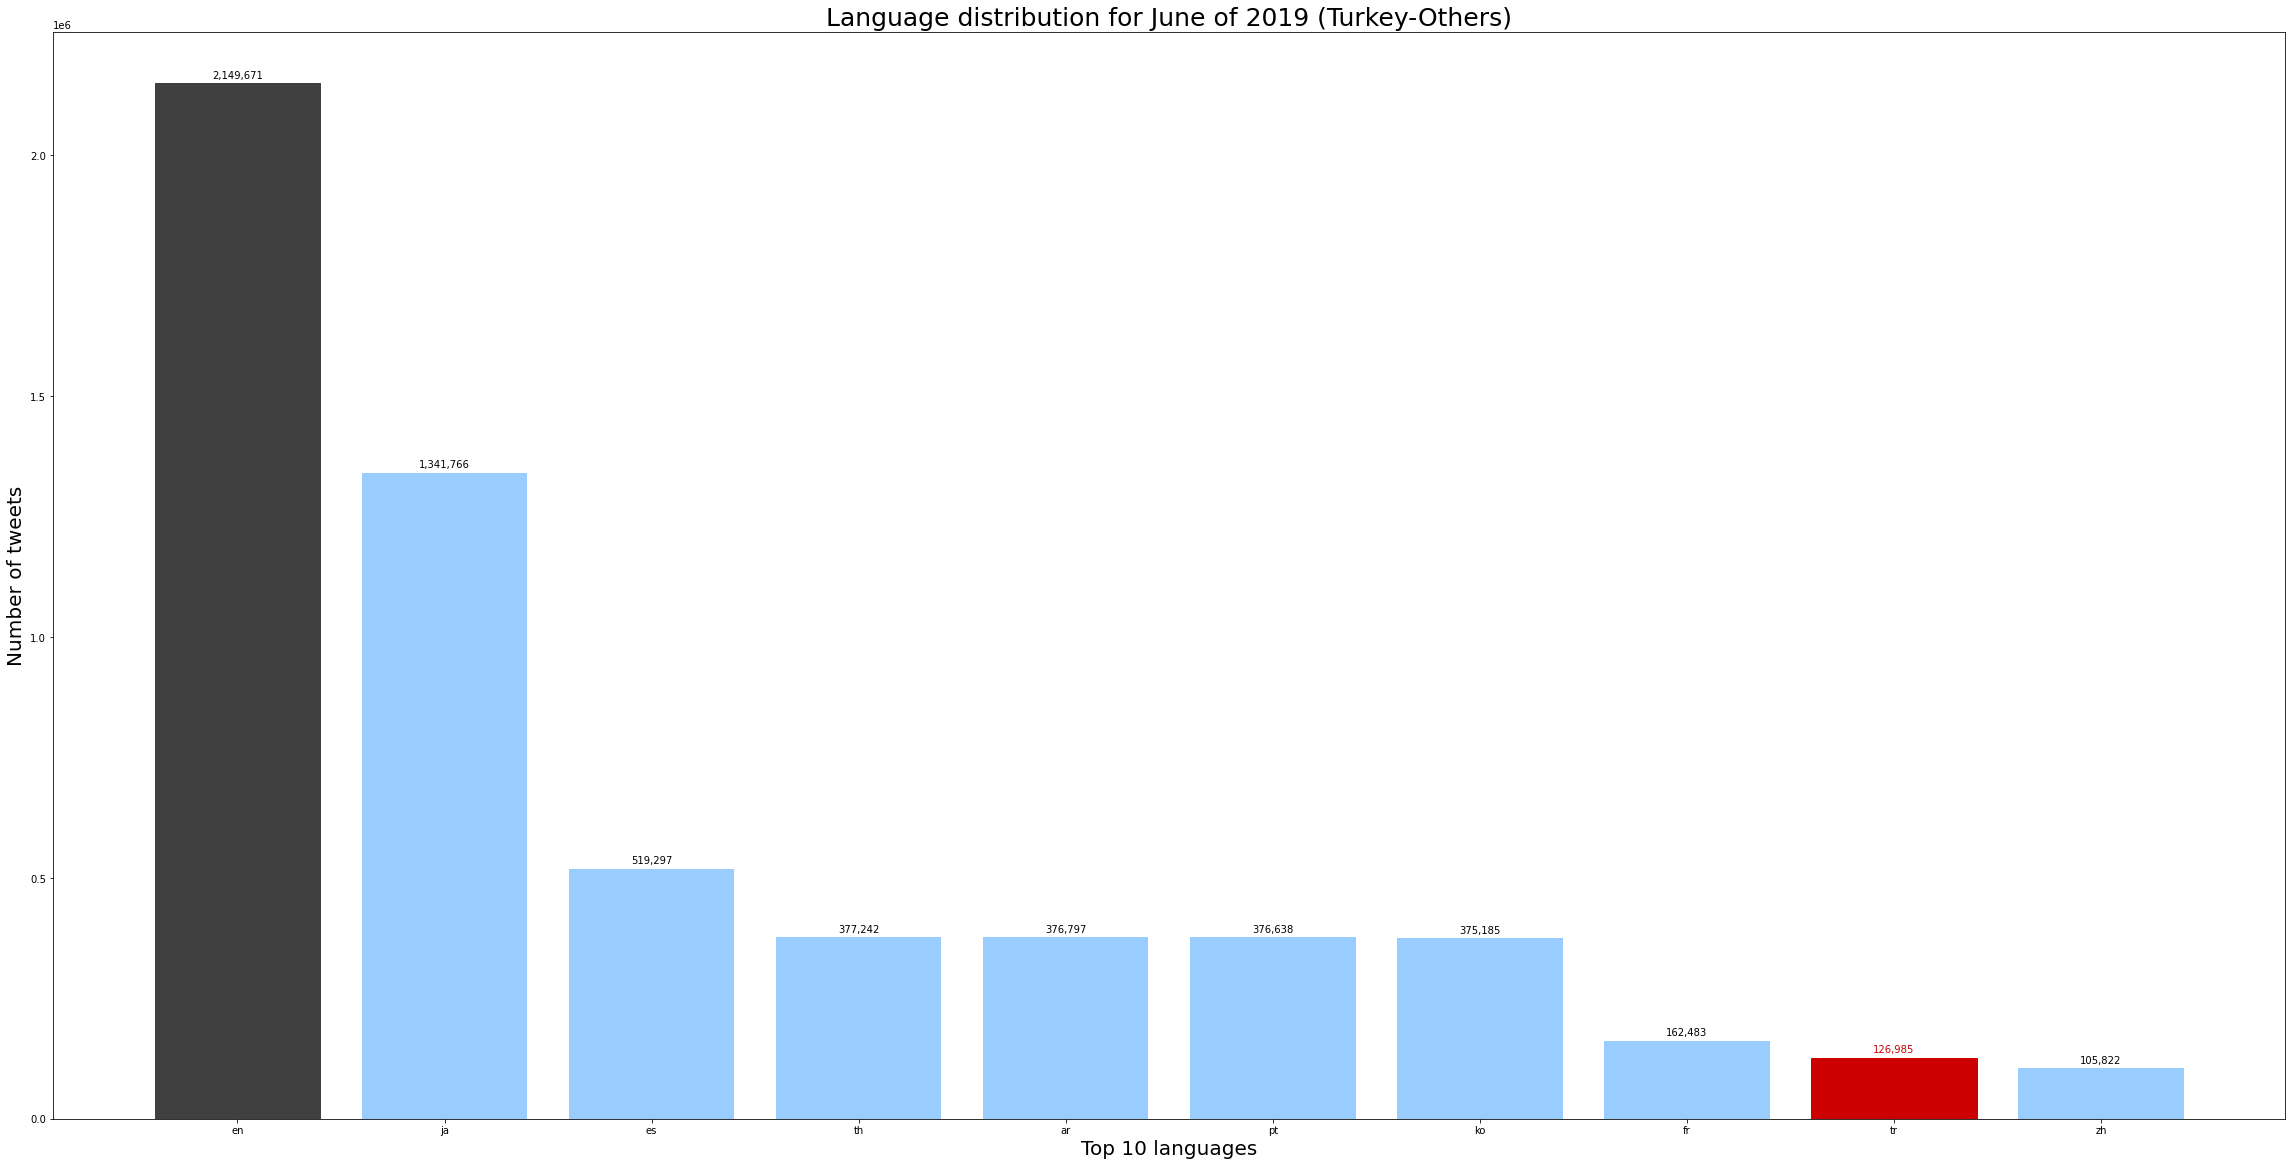

In [77]:
fig = plt.figure(figsize=(40,20))
ax1 = plt.subplot(111)
ret = ax1.bar(viz_df2['Languages'],viz_df2['tweets'],color='#99ccff')
ret[0].set_color('#404040')
ret[8].set_color('#CC0000')
for pX,pY in enumerate(viz_df2.tweets):
    if pX==8:
        ax1.annotate('{:,}'.format(pY), xy=(pX,pY+10000), ha='center', color='#CC0000')
    else:    
        ax1.annotate('{:,}'.format(pY), xy=(pX,pY+10000), ha='center')
plt.xlabel("Top 10 languages" , fontsize=20)
plt.ylabel("Number of tweets", fontsize=20)
plt.title("Language distribution for June of 2019 (Turkey-Others)",fontsize=25)
plt.savefig('tr-others-june.png')
plt.show()

In [44]:
june_Otherstrdf = df1.loc[no_of_junotherstr.index]

In [45]:
june_Otherstrdf.shape

(126985, 2)

In [46]:
june_Otherstrdf.head()

,Tweet_text,Region
9,RT @vutinplatimir: @lagaribey konuya dair yerl...,Others
20,RT @gazeteistiklal: Günün Özeti (17.06.2019 Pa...,Others
49,RT @ekrem_imamoglu: İstanbul'da kurdukları isr...,Others
109,@metehanakdg pardon çok yanlış geldim ben hqux...,Others
240,@hailsslytherinn @gokozerrr Çarpılırsın aq,Others


In [47]:
june_Otherstrdf = june_Otherstrdf.sample(n=len(june_turkey))

In [48]:
df_turkey = june_turkey.append([june_Otherstrdf])

In [49]:
df_turkey.shape

(161926, 2)

In [50]:
df_turkey = df_turkey.sample(frac=1, random_state = 24).reset_index(drop=True)

In [51]:
df_turkey.head()

,Tweet_text,Region
0,RT @06melihgokcek: İMAMOĞLU’NUN VAADLERİ İNSAN...,Others
1,RT @demir_54_: Trabzonun şampiyonluğu geri ver...,Others
2,@muhlisergan Artık pas vermiyorsun.. bilmeden ...,Others
3,RT @kocaguregliman: @ibrahimsinasi81 @_izayla_...,Others
4,RT @ecdadiosmanli25: #neekersen\nNe uzun ne kı...,Turkey


In [52]:
df_turkey.to_csv('juneturkey-training.csv',index=False,header=True)

In [53]:
df2 = pd.read_csv(r'julyothersturkey.csv')

In [54]:
df2.head()

,Screen_Name,Tweet_text,Region
0,syuuta17,RT @rikudes2076: @TanestarP ←理想 理想→,Others
1,tsuchaman,遠距離恋愛で 物理的な距離感に耐えられなくなるのが男性 心理的な距離感に耐えられなくなるのが...,Others
2,isalittlegirl_,RT @Nataaan93: i feel like i owe my parents so...,Others
3,kanon_tiny,RT @hatyunemisi: d！ラクガキ詰め!!!!!!!!!!!!!!!!\nみんな...,Others
4,mmalloorryy,RT @Absvrde: @abbygov 🤔 https://t.co/p8JvUq1gTB,Others


In [55]:
print(df2.isnull().sum())

Screen_Name     2
Tweet_text     22
Region          0
dtype: int64


In [56]:
df2 = df2.dropna(axis = 0, how ='any')

In [57]:
print(df2.isnull().sum())

Screen_Name    0
Tweet_text     0
Region         0
dtype: int64


In [58]:
df2['Tweet_text'] = df2['Tweet_text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) 

In [59]:
july_otherstr_langid = df2['Tweet_text'].apply(langid.classify)
july_otherstr_langs = july_otherstr_langid.apply(lambda tuple: tuple[0])

In [61]:
# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(july_otherstr_langs.unique()))

# percent of the total dataset in English
print("Percent of data in Turkish (estimated):")
print((sum(july_otherstr_langs=="tr")/len(july_otherstr_langs))*100)

Number of tagged languages (estimated):
97
Percent of data in Turkish (estimated):
1.6881450940371083


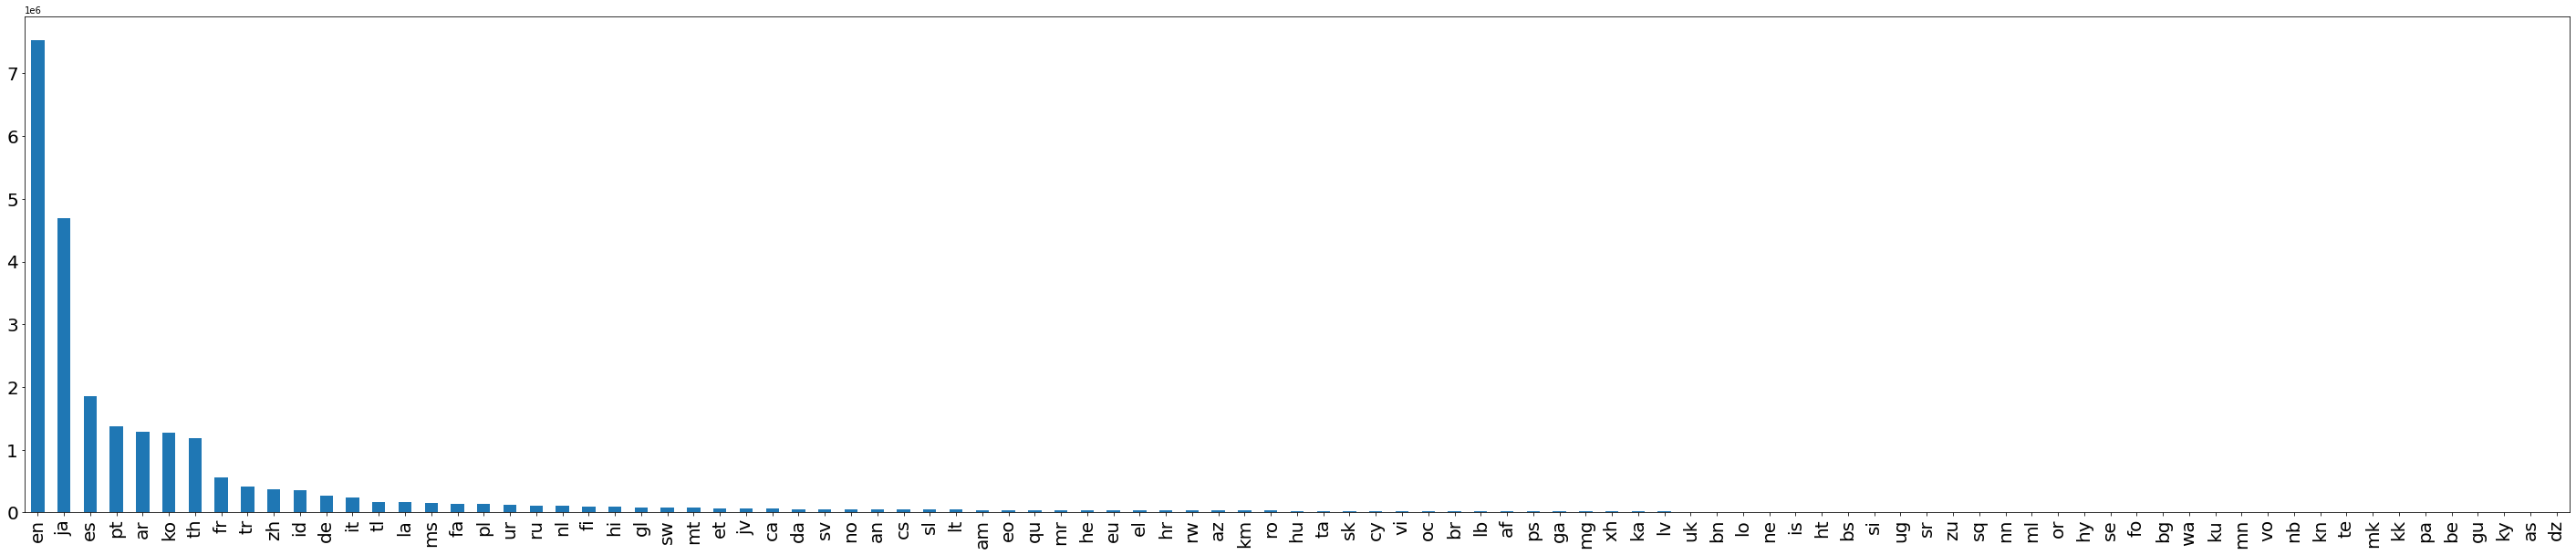

In [62]:
# convert our list of languages to a dataframe
july_otherstrlangs_df = pd.DataFrame(july_otherstr_langs)

# count the number of times we see each language
july_otherstrlangs_count = july_otherstrlangs_df.Tweet_text.value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
july_otherstrlangs_count.plot.bar(figsize=(50,10), fontsize=20)

In [63]:
no_of_julyotherstr = july_otherstr_langs[july_otherstr_langs == 'tr']

In [64]:
print(no_of_julyotherstr.index)

Int64Index([      20,       86,      205,      234,      242,      299,
                 348,      380,      612,      622,
            ...
            24351129, 24351444, 24351456, 24351458, 24351603, 24351612,
            24351638, 24351736, 24351737, 24351821],
           dtype='int64', length=411095)


In [65]:
print(Counter(july_otherstr_langs.values))

Counter({'en': 7534567, 'ja': 4689162, 'es': 1850810, 'pt': 1373604, 'ar': 1285630, 'ko': 1278154, 'th': 1179987, 'fr': 565053, 'tr': 411095, 'zh': 371317, 'id': 356586, 'de': 261659, 'it': 240625, 'tl': 171413, 'la': 168462, 'ms': 147376, 'fa': 136507, 'pl': 129989, 'ur': 118678, 'ru': 114430, 'nl': 101665, 'fi': 92624, 'hi': 90063, 'gl': 83653, 'sw': 75544, 'mt': 73253, 'et': 69442, 'jv': 65053, 'ca': 58151, 'da': 53767, 'sv': 51317, 'no': 50437, 'an': 48413, 'cs': 47166, 'sl': 45355, 'lt': 44335, 'am': 39373, 'eo': 39269, 'qu': 38271, 'mr': 35807, 'he': 35485, 'eu': 34907, 'el': 34616, 'hr': 32989, 'rw': 32272, 'az': 31264, 'km': 31230, 'ro': 29430, 'hu': 27236, 'ta': 25363, 'sk': 22994, 'cy': 22649, 'vi': 22630, 'oc': 21202, 'br': 20615, 'lb': 20094, 'af': 16172, 'ps': 16128, 'ga': 16074, 'mg': 15573, 'xh': 14331, 'ka': 14116, 'lv': 13470, 'uk': 12327, 'bn': 11922, 'lo': 11746, 'ne': 11311, 'is': 10107, 'ht': 10049, 'bs': 9905, 'si': 9185, 'ug': 8559, 'sr': 8525, 'zu': 8157, 'sq': 

In [66]:
c = Counter(july_otherstr_langs.values)

In [67]:
dict(sorted(c.items(), key=lambda item: item[1], reverse=True,)).keys()

dict_keys(['en', 'ja', 'es', 'pt', 'ar', 'ko', 'th', 'fr', 'tr', 'zh', 'id', 'de', 'it', 'tl', 'la', 'ms', 'fa', 'pl', 'ur', 'ru', 'nl', 'fi', 'hi', 'gl', 'sw', 'mt', 'et', 'jv', 'ca', 'da', 'sv', 'no', 'an', 'cs', 'sl', 'lt', 'am', 'eo', 'qu', 'mr', 'he', 'eu', 'el', 'hr', 'rw', 'az', 'km', 'ro', 'hu', 'ta', 'sk', 'cy', 'vi', 'oc', 'br', 'lb', 'af', 'ps', 'ga', 'mg', 'xh', 'ka', 'lv', 'uk', 'bn', 'lo', 'ne', 'is', 'ht', 'bs', 'si', 'ug', 'sr', 'zu', 'sq', 'nn', 'ml', 'or', 'hy', 'se', 'fo', 'bg', 'wa', 'ku', 'mn', 'vo', 'nb', 'kn', 'te', 'mk', 'kk', 'pa', 'be', 'gu', 'ky', 'as', 'dz'])

In [68]:
dict(sorted(c.items(), key=lambda item: item[1], reverse=True,)).values()

dict_values([7534567, 4689162, 1850810, 1373604, 1285630, 1278154, 1179987, 565053, 411095, 371317, 356586, 261659, 240625, 171413, 168462, 147376, 136507, 129989, 118678, 114430, 101665, 92624, 90063, 83653, 75544, 73253, 69442, 65053, 58151, 53767, 51317, 50437, 48413, 47166, 45355, 44335, 39373, 39269, 38271, 35807, 35485, 34907, 34616, 32989, 32272, 31264, 31230, 29430, 27236, 25363, 22994, 22649, 22630, 21202, 20615, 20094, 16172, 16128, 16074, 15573, 14331, 14116, 13470, 12327, 11922, 11746, 11311, 10107, 10049, 9905, 9185, 8559, 8525, 8157, 8058, 7551, 7058, 7001, 6850, 6806, 6082, 5953, 5282, 4986, 4339, 4137, 3972, 3331, 3330, 2992, 2973, 2573, 2094, 1798, 1696, 1307, 1012])

In [69]:
import matplotlib.pyplot as plt

new_data3 = {'tweets':[7534567, 4689162, 1850810, 1373604, 1285630, 1278154, 1179987, 565053, 411095, 371317],
           'Languages':['en', 'ja', 'es', 'pt', 'ar', 'ko', 'th', 'fr', 'tr', 'zh']
}

viz_df3 = pd.DataFrame.from_dict(new_data3);viz_df3

,tweets,Languages
0,7534567,en
1,4689162,ja
2,1850810,es
3,1373604,pt
4,1285630,ar
5,1278154,ko
6,1179987,th
7,565053,fr
8,411095,tr
9,371317,zh


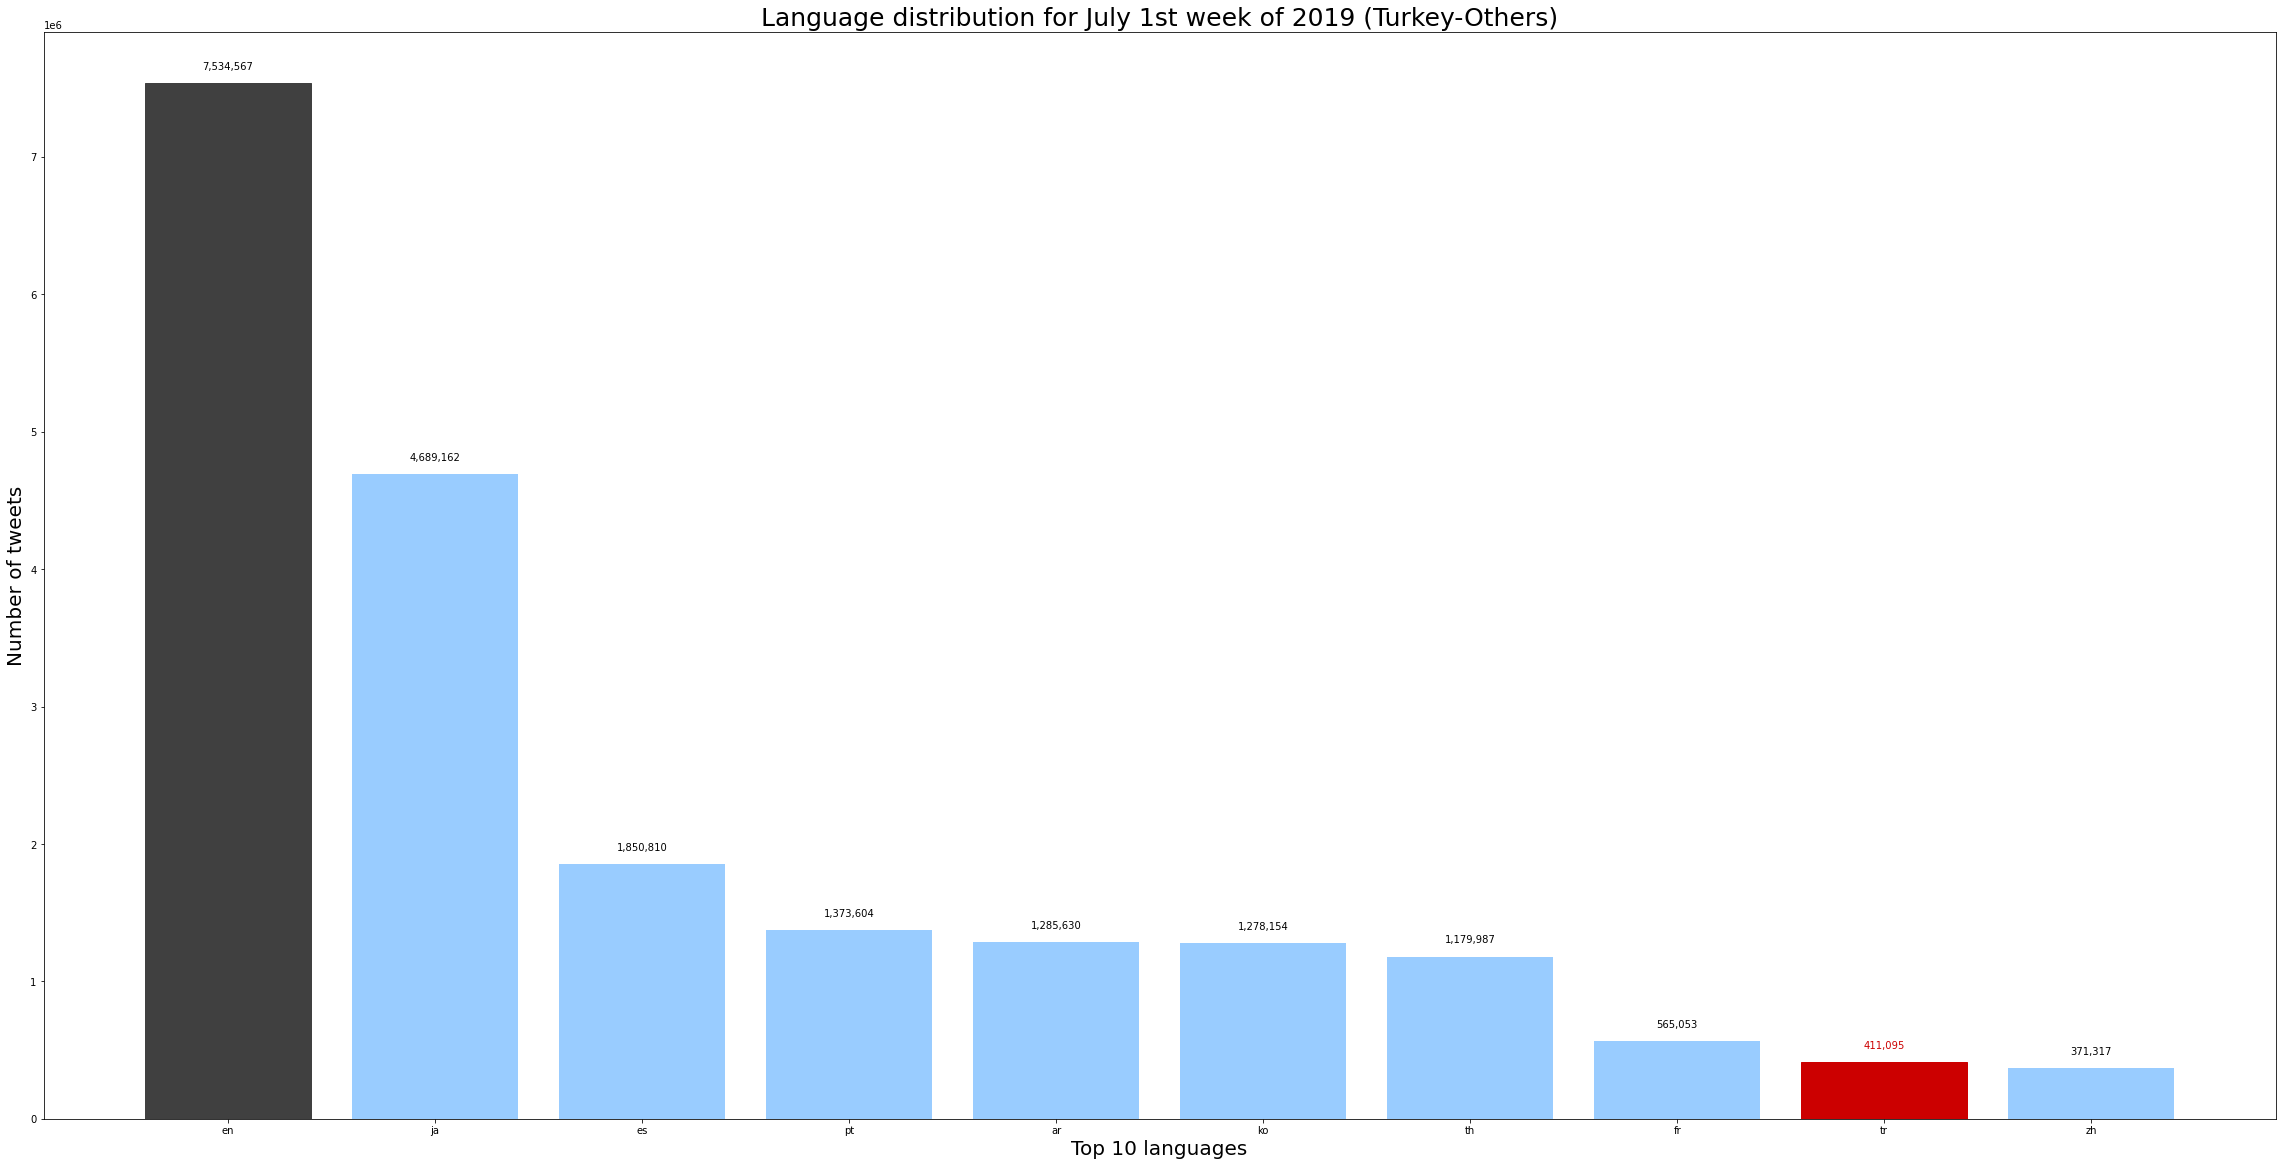

In [72]:
fig = plt.figure(figsize=(40,20))
ax1 = plt.subplot(111)
ret = ax1.bar(viz_df3['Languages'],viz_df3['tweets'],color='#99ccff')
ret[0].set_color('#404040')
ret[8].set_color('#CC0000')
for pX,pY in enumerate(viz_df3.tweets):
    if pX==8:
        ax1.annotate('{:,}'.format(pY), xy=(pX,pY+100000), ha='center', color='#CC0000')
    else:    
        ax1.annotate('{:,}'.format(pY), xy=(pX,pY+100000), ha='center')
plt.xlabel("Top 10 languages" , fontsize=20)
plt.ylabel("Number of tweets", fontsize=20)
plt.title("Language distribution for July 1st week of 2019 (Turkey-Others)",fontsize=25)
plt.savefig('tr-others-july.png')
plt.show()

In [73]:
july_Otherstrdf = df2.loc[no_of_julyotherstr.index]

In [74]:
july_Otherstrdf.shape

(411095, 3)

In [75]:
july_Otherstrdf.head()

,Screen_Name,Tweet_text,Region
20,Murat99000316,@mehtap664 Günaydın 😊,Others
86,KustaLUKA,RT @sevgiippeek: Gönlümüze “One Minute”ile sar...,Others
205,turan787878,RT @UDora16: Haksizlik karsisinda susan dilsiz...,Others
234,tubaozturk61,"RT @MehToprak: ""Biz Suriyelilerin içinde iyile...",Others
242,GonulKabaoglu,RT @silivri_muduru: Fuhuşla ilgili birinin fot...,Others


In [76]:
july_Otherstrdf.to_csv('Testing_July_Others_Turkey.csv')